**Tree Weights Report**

General class for the tree object and consider a tree where each node has k children, and each child receives weight:

In [67]:
class Node:
    def __init__(self, weight):
        self.weight = weight
        self.children = []

    @property
    def is_leaf(self):
        return len(self.children)==0


**2.Building a depth‑3 tree**

In [70]:
def build_tree(k, max_depth=3):
    root = Node(1.0)
    def grow(node, depth):
        if depth==max_depth: return
        child_w = node.weight / k
        for _ in range(k):
            c = Node(child_w)
            node.children.append(c)
            grow(c, depth+1)
    grow(root,0)
    return root


**3.DFS leaf‑sum(should return 1)**

Need to sum only leaf weights, because all weight propagates to the leaves, so total leaf weight=1


In [73]:
def dfs_leaf_sum(node):
    if node.is_leaf:
        return node.weight
    return sum(dfs_leaf_sum(c) for c in node.children)

**4. BFS leaf‑sum (should also return 1)**

In [76]:
from collections import deque

def bfs_leaf_sum(root):
    q = deque([root])
    total = 0
    while q:
        cur = q.popleft()
        if cur.is_leaf:
            total += cur.weight
        q.extend(cur.children)
    return total


**5. Verify DFS/BFS for various**

In [79]:
results=[]
for k in range(2,8):
    r=build_tree(k)
    results.append((k, dfs_leaf_sum(r), bfs_leaf_sum(r)))

results

[(2, 1.0, 1.0),
 (3, 1.0, 0.9999999999999993),
 (4, 1.0, 1.0),
 (5, 1.0, 1.0000000000000007),
 (6, 1.0, 1.0000000000000029),
 (7, 1.0, 0.9999999999999963)]

**6. Visualization**

Both DFS and BFS leaf sums should consistently equal 1

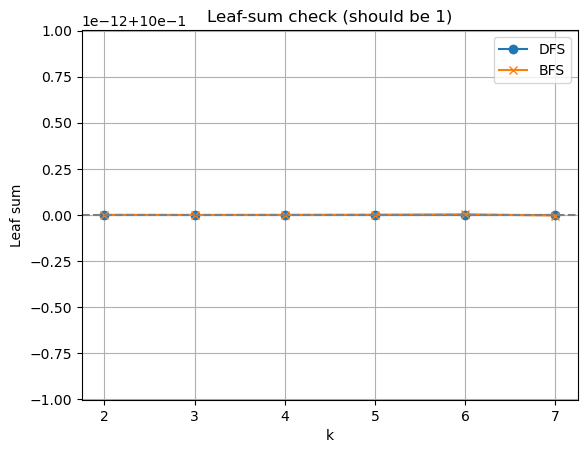

In [82]:
import matplotlib.pyplot as plt
ks=[r[0] for r in results]
dfs=[r[1] for r in results]
bfs=[r[2] for r in results]

plt.figure()
plt.plot(ks, dfs, marker='o', label='DFS')
plt.plot(ks, bfs, marker='x', label='BFS')
plt.axhline(1,color='grey',linestyle='--')
plt.title('Leaf-sum check (should be 1)')
plt.xlabel('k')
plt.ylabel('Leaf sum')
plt.grid(True)
plt.legend()
plt.show()

answer for quetion 7: 
Flip‑sign versions explanation
In the Java code, each flip-search works as follows:
- On first traversal, leaf-sum is `+1`.
- Each node's weight is flipped (multiplied by `-1`).
- On the second traversal, leaf-sum is `-1`.

Why DFS can be recursive but BFS should not be?

DFS explores one path at a time → recursion depth equals tree height. This is safe for trees with small height.

BFS explores levels, not depth. Trees with large branching factor create extremely wide levels. Recursive BFS must create one recursive call per level, while still holding large queues. This causes: huge memory usage, very deep recursion, high risk of StackOverflowError.


**Conclusion**

-The model where each child has parent_weight / k produces a tree whose leaf sum is always 1.
-DFS and BFS both correctly compute the leaf-sum.
-Flip-sign versions produce 1 and −1 on consecutive runs.
-Recursive BFS is theoretically possible but not recommended due to stack‑overflow risks